In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
def filter_data(X, y, classes):
    mask = np.isin(y, classes)
    return X[mask], y[mask]

In [4]:
classes = [6, 9]
X_train, y_train = filter_data(X_train, y_train, classes)
X_test, y_test = filter_data(X_test, y_test, classes)

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

In [6]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [7]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Use binary_crossentropy for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
y_train_resampled = np.where(y_train_resampled == 6, 0, 1)
y_test = np.where(y_test == 6, 0, 1)


In [9]:
trained=model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9857 - loss: 0.0697 - val_accuracy: 0.9975 - val_loss: 0.0114
Epoch 2/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9979 - loss: 0.0057 - val_accuracy: 0.9969 - val_loss: 0.0091
Epoch 3/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9969 - val_loss: 0.0095
Epoch 4/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9997 - loss: 0.0020 - val_accuracy: 0.9990 - val_loss: 0.0033
Epoch 5/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9997 - loss: 9.8939e-04 - val_accuracy: 0.9975 - val_loss: 0.0088
Epoch 6/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.2541e-04 - val_accuracy: 0.9975 - val_loss: 0.0087
Epoch 7/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 3.7062e-05 - val_accuracy: 0.9969 - val_loss: 0.0087
Epoch 8/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.9617e-05 -

In [10]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.4870360955770208
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       958
           1       0.00      0.00      0.00      1009

    accuracy                           0.49      1967
   macro avg       0.24      0.50      0.33      1967
weighted avg       0.24      0.49      0.32      1967

[[ 958    0]
 [1009    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


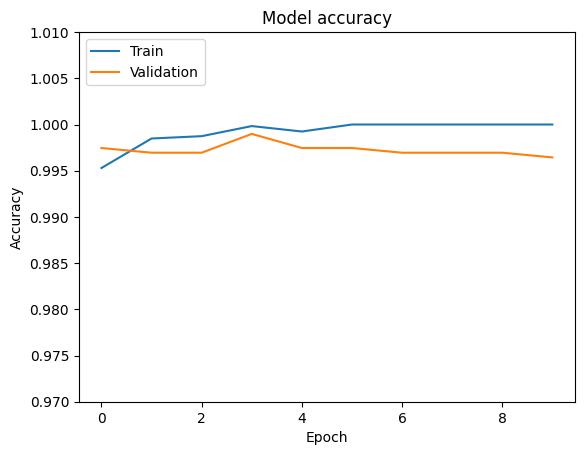

In [11]:
# prompt: plot the accuracy with the epoch but zoomed out

import matplotlib.pyplot as plt
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim(0.97, 1.01)
plt.show()


In [12]:
import numpy as np
# Assuming you want to test the model on the original test set (X_test, y_test)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.4870360955770208
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       958
           1       0.00      0.00      0.00      1009

    accuracy                           0.49      1967
   macro avg       0.24      0.50      0.33      1967
weighted avg       0.24      0.49      0.32      1967

[[ 958    0]
 [1009    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
